## Batter up 

The movie [Moneyball](http://en.wikipedia.org/wiki/Moneyball_%28film%29) focuses on
the "quest for the secret of success in baseball". It follows a low-budget team, 
the Oakland Athletics, who believed that underused statistics, such as a player's 
ability to get on base, better predict the ability to score runs than typical 
statistics like home runs, RBIs (runs batted in), and batting average. Obtaining 
players who excelled in these underused statistics turned out to be much more 
affordable for the team.

In this lab we'll be looking at data from all 30 Major League Baseball teams and
examining the linear relationship between runs scored in a season and a number 
of other player statistics. Our aim will be to summarize these relationships 
both graphically and numerically in order to find which variable, if any, helps 
us best predict a team's runs scored in a season.

## The data

Let's load up the data for the 2011 season.

In [3]:
import pandas as pd
mlb11 = pd.read_csv('mlb11.csv')

In addition to runs scored, there are seven traditionally used variables in the 
data set: at-bats, hits, home runs, batting average, strikeouts, stolen bases, 
and wins. There are also three newer variables: on-base percentage, slugging 
percentage, and on-base plus slugging. For the first portion of the analysis 
we'll consider the seven traditional variables. At the end of the lab, you'll 
work with the newer variables on your own.

**Exercise 1** What type of plot would you use to display the relationship between `runs` and one of the other numerical variables? Plot this relationship using the variable `at_bats` as the predictor. Does the relationship look linear? If you knew a team’s `at_bats`, would you be comfortable using a linear model to predict the number of runs?

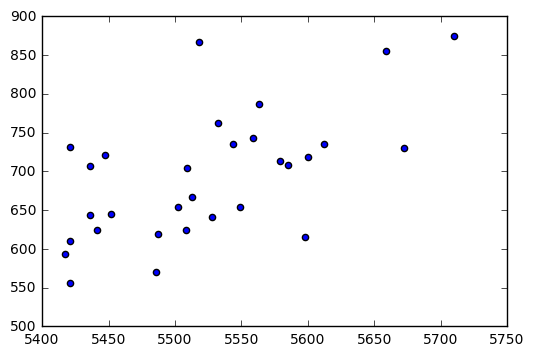

In [4]:
import matplotlib.pyplot as plt
plt.scatter(mlb11['at_bats'], mlb11['runs'])
plt.show()

If the relationship looks linear, we can quantify the strength of the
relationship with the correlation coefficient.

In [5]:
mlb11['runs'].corr(mlb11['at_bats'])

0.6106270467206687

## Sum of squared residuals

Think back to the way that we described the distribution of a single variable. Recall that we discussed characteristics such as center, spread, and shape. It's also useful to be able to describe the relationship of two numerical variables, such as `runs` and `at_bats` above.

** Exercise 2**  Looking at your plot from the previous exercise, describe the relationship between these two variables. Make sure to discuss the form, direction, and strength of the relationship as well as any unusual observations.

Just as we used the mean and standard deviation to summarize a single variable, we can summarize the relationship between these two variables by finding the line that best follows their association. 

*The R version of this [lab](http://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/simple_regression/simple_regression.html) contains an interactive function that you can use to manually find a good least squares fit to the data. This function has not been ported to the Python version of the lab.*

## The linear model

It is rather cumbersome to try to get the correct least squares line, i.e. the line that minimizes the sum of squared residuals, through trial and error. Instead we can use Python to fit the linear model (a.k.a. regression line). Sci Kit Learn's `LinearRegression` class in Python is a full featured regression model and is often reccomended when using regression for predictions. However, statsmodels also has a regression model which provides a better statistical summary than Sci Kit Learn's model. We will use statsmodels here.

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
m1 = smf.ols('runs ~ at_bats', data=mlb11).fit()

The first argument in the function `ols` is a formula that takes the form 
`y ~ x`. Here it can be read that we want to make a linear model of `runs` as a 
function of `at_bats`. The second argument specifies that Python should look in the 
`mlb11` data frame to find the `runs` and `at_bats` variables.

The output of `ols` is an object that contains all of the information we need 
about the linear model that was just fit. We can access this information using 
the summary function.

In [9]:
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Wed, 06 Jun 2018   Prob (F-statistic):           0.000339
Time:                        15:32:07   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2789.2429    853.696     -3.267      0.0

Let's consider this output piece by piece. First, some summary output is shown along with the name of the dependent variable. The summary includes Multiple R-squared, or more simply, $R^2$. The $R^2$ value represents the 
proportion of variability in the response variable that is explained by the 
explanatory variable. For this model, 37.3% of the variability in runs is 
explained by at-bats.

The "Coefficients" table shown next is key; its first 
column displays the linear model's y-intercept and the coefficient of `at_bats`.
With this table, we can write down the least squares regression line for the 
linear model:

$$\hat{y} = -2789.2429 + 0.6305 * atbats$$

**Exercise 4** Fit a new model that uses `homeruns` to predict `runs`. Using the estimates from the R output, write the equation of the regression line. What does the slope tell us in the context of the relationship between success of a team and its home runs?

In [10]:
m2 = smf.ols('homeruns ~ runs', data=mlb11).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:               homeruns   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     46.98
Date:                Wed, 06 Jun 2018   Prob (F-statistic):           1.90e-07
Time:                        15:37:41   Log-Likelihood:                -134.44
No. Observations:                  30   AIC:                             272.9
Df Residuals:                      28   BIC:                             275.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -85.1566     34.797     -2.447      0.0

## Prediction and prediction errors

Let's create a scatterplot with the least squares line laid on top.

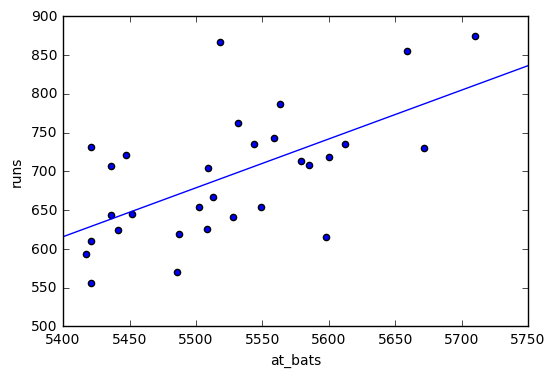

In [15]:
from statsmodels.graphics.regressionplots import abline_plot
ax = mlb11.plot(x='at_bats', y='runs', kind='scatter')
abline_plot(model_results=m1, ax=ax)
plt.show()

The function `abline_plot` plots a line based on its slope and intercept. Here, we 
used a shortcut by providing the model `m1`, which contains both parameter 
estimates. This line can be used to predict $y$ at any value of $x$. When 
predictions are made for values of $x$ that are beyond the range of the observed
data, it is referred to as *extrapolation* and is not usually recommended. 
However, predictions made within the range of the data are more reliable. 
They're also used to compute the residuals.

**Exercise 5**  If a team manager saw the least squares regression line and not the actual data, how many runs would he or she predict for a team with 5,578 at-bats? Is this an overestimate or an underestimate, and by how much? In other words, what is the residual for this prediction?

## Model diagnostics

To assess whether the linear model is reliable, we need to check for (1) 
linearity, (2) nearly normal residuals, and (3) constant variability.

*Linearity*: You already checked if the relationship between runs and at-bats
is linear using a scatterplot. We should also verify this condition with a plot 
of the residuals vs. at-bats. Recall that any code following a *#* is intended
to be a comment that helps understand the code but is ignored by Python.

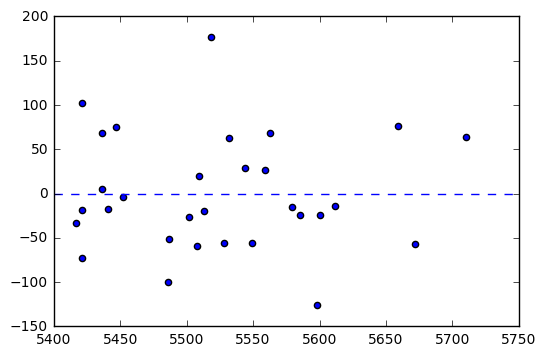

In [29]:
fig, ax = plt.subplots()
ax.scatter(mlb11['at_bats'], m1.resid)
abline_plot(intercept= 0, slope=0, ax=ax, ls='--') # adds a horizontal dashed line at y = 0
plt.show()

**Exercise 6** Is there any apparent pattern in the residuals plot? What does this indicate about the linearity of the relationship between runs and at-bats?

*Nearly normal residuals*: To check this condition, we can look at a histogram

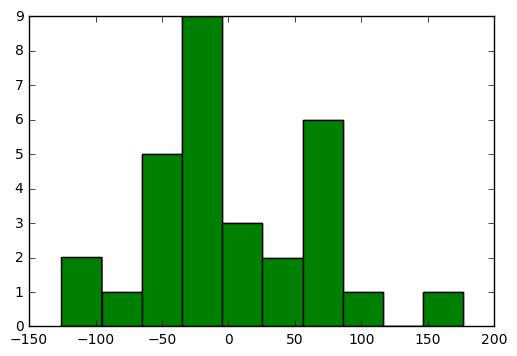

In [31]:
plt.hist(m1.resid)
plt.show()

or a normal probability plot of the residuals.

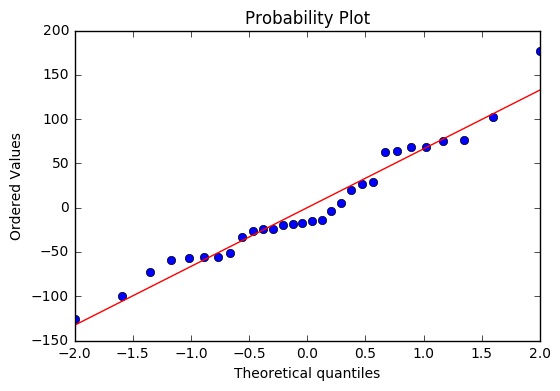

In [34]:
from scipy.stats import probplot
probplot(m1.resid, plot=plt)
plt.show()

**Excercise 7** Based on the histogram and the normal probability plot, does the nearly normal residuals condition appear to be met?

*Constant variability*:

** Exercise 8**  Based on the plot in (1), does the constant variability condition appear to be met?

## On Your Own

-   Choose another traditional variable from `mlb11` that you think might be a 
    good predictor of `runs`. Produce a scatterplot of the two variables and fit 
    a linear model. At a glance, does there seem to be a linear relationship?

-   How does this relationship compare to the relationship between `runs` and 
    `at_bats`? Use the R$^2$ values from the two model summaries to compare. 
    Does your variable seem to predict `runs` better than `at_bats`? How can you
    tell?

-   Now that you can summarize the linear relationship between two variables, 
    investigate the relationships between `runs` and each of the other five 
    traditional variables. Which variable best predicts `runs`? Support your 
    conclusion using the graphical and numerical methods we've discussed (for 
    the sake of conciseness, only include output for the best variable, not all 
    five).

-   Now examine the three newer variables. These are the statistics used by the 
    author of *Moneyball* to predict a teams success. In general, are they more 
    or less effective at predicting runs that the old variables? Explain using 
    appropriate graphical and numerical evidence. Of all ten variables we've 
    analyzed, which seems to be the best predictor of `runs`? Using the limited 
    (or not so limited) information you know about these baseball statistics, 
    does your result make sense?

-   Check the model diagnostics for the regression model with the variable you 
    decided was the best predictor for runs.

*This notebook is based on the OpenIntro R lab [Introduction to Linear Regression](http://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/simple_regression/simple_regression.html).*